# <center> Simulación caso de Negocio - Análisis de Datos con Tableau</center>

Este material expande el marco inicial de la temática en un contexto del análisis y resolución de un caso práctico con Python y Tableau. Tiene por objetivo fortalecer los conocimientos teóricos y prácticos de visualización de datos que permitan resumir datos complejos para la toma de decisiones.

💡 _**Nota**_: _Este material ha sido preparado por la **Universidad de las Américas - UDLA**. Parte del contenido ha sido adaptado a partir de material público liberado en [Kaggle](http://kaggle.com), [Datacamp](http://datacamp.com) y otros sitios web._

## 1. Evaluación de necesidades del negocio
La fase de evaluación del caso de negocio requiere que se cree, evalúe y apruebe un caso de negocio antes de proceder a las tareas reales de análisis práctico.

El ingreso anual de un individuo resulta de varios factores. Intuitivamente, está influenciado por el nivel de educación, la edad, el sexo, la ocupación, etc. de la persona. Nuestro dataset almacena informacion sobre personas recolentando una cantidad de campos.

El objetivo del analisis es identificar si las personas ganan mas o menos de 50k, haciedo uso de los campos que caracterizan los individuos.

# 2. Identificación de datos
La etapa de identificación de datos consiste en identificar los conjuntos de datos necesarios para el proyecto de análisis y sus fuentes.


Investigando los datos en internet podemos ver todas las variables y la descripcion de las mismas.

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- - inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

# 3. Adquisición y filtrado de datos
Durante la etapa de adquisición y filtrado de datos se recopilan los datos de todas las fuentes de datos que se identificaron durante la etapa Identificación de datos.

No es necesario el filtrado de datos.

# 4. Extracción de datos
Durante esta etapa se debe extraer datos dispares y transformarlos en un formato que pueda facilitar el análisis de datos. 

**Importar librerías**
```Python
# Sintaxis general
import modulo as alias
- **modulo**: (módulo) librería a importar.
- **alias**: alias con el nos referiremos a la libería. 
Ejemplo: 
  - Importamos la librería pandas:
import pandas as pd
```

In [95]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.core.display import display, HTML, Javascript
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance
from plotly.offline import download_plotlyjs,init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv("adult.csv")
df.shape

(32561, 15)

In [97]:
df.head(5)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [98]:
df['income'].value_counts()/df.shape[0]

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

Podemos ver que el 75 porciento de las personas en nuestro data set ganan menos que 50k.

**Cargar el dataset**

```Python
Leemos un archivo usando el alias **pd**, luego punto **.**, y a seguir la función a utilizar **read_csv**.
Ejemplo:
df = pd.read_csv("data/nombre_archivo.csv")
```

# 5.Validación y limpieza de datos
Los datos no válidos pueden sesgar y falsear los resultados de los análisis. La etapa de validación y depuración de datos se enfoca en establecer reglas de validación a menudo complejas y a eliminar cualquier dato no válido conocido.

**EDA - Análisis exploratorio de datos**

<Axes: >

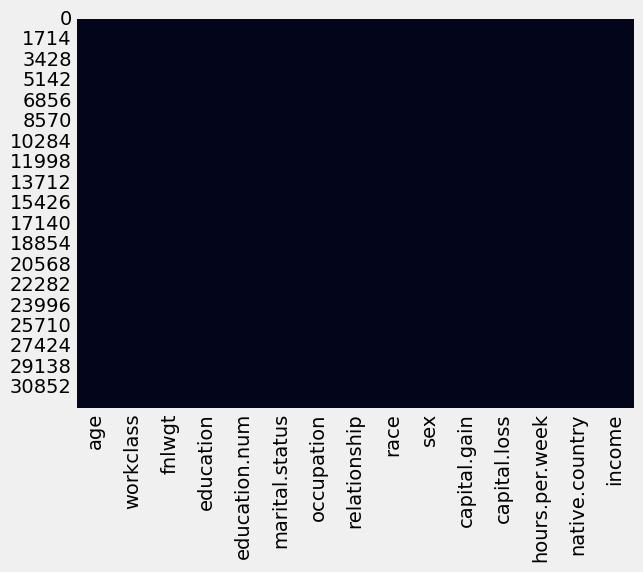

In [99]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

No existe valores nullos sin envargo podemos ver que tenemos valores '?'

In [100]:
print(set(df['income']))
print(set(df['capital.gain']))
print(set(df['workclass']))

{'<=50K', '>50K'}
{0, 2050, 4101, 14344, 7688, 2062, 2580, 22040, 3103, 1055, 25124, 2597, 4650, 18481, 2105, 5178, 1086, 3137, 6723, 2635, 4687, 594, 20051, 1111, 5721, 3674, 2653, 1639, 6767, 114, 2174, 1151, 2176, 7298, 25236, 1173, 2202, 99999, 9386, 15020, 15024, 4787, 27828, 2228, 6849, 3781, 3273, 7896, 6360, 3818, 13550, 2290, 3325, 4865, 14084, 1797, 7430, 2829, 6418, 7443, 10520, 2329, 4386, 1831, 7978, 2346, 34095, 3887, 2354, 1848, 4416, 4931, 3908, 2885, 10566, 4934, 5455, 3411, 2387, 9562, 3418, 2907, 41310, 6497, 3942, 2407, 3432, 10605, 2414, 6514, 2936, 3456, 1409, 3464, 3471, 1424, 2961, 914, 401, 2964, 5013, 4508, 11678, 2463, 2977, 8614, 1455, 2993, 5556, 1471, 5060, 6097, 15831, 2009, 991, 4064, 1506, 2538, 2036}
{'?', 'Never-worked', 'Private', 'Self-emp-not-inc', 'State-gov', 'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Local-gov'}


<Axes: >

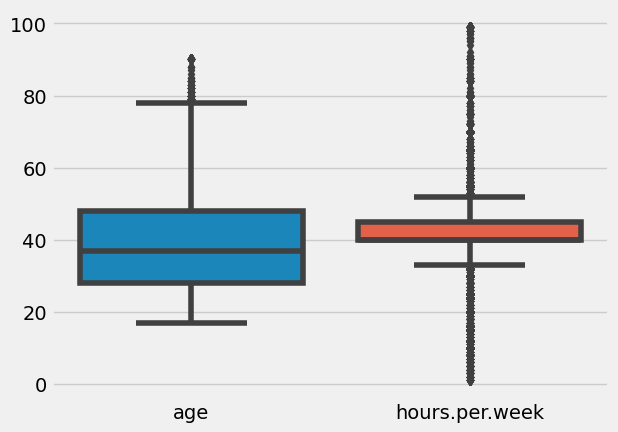

In [101]:
sns.boxplot(data= df[["age","hours.per.week"]] ) 
#aparentemenente existen muchos datos que pordian ser outliers

In [102]:
df.describe()
num_columns= ['age', 'fnlwgt',	'education.num',	'capital.gain',	'capital.loss', 'hours.per.week']

In [103]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Limpieza de datos**

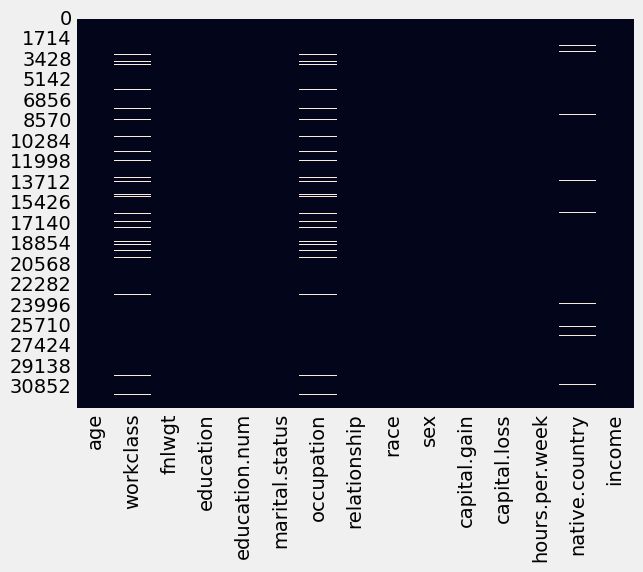

In [104]:
df2 = df[df != '?']
sns.heatmap(df2.isnull(), cbar=False)
df2.dropna().shape
df=df2.dropna()

**Transformación de datos**

Usando una matriz de  correlacion podemos ver los campos que estan correlacionados a la variable 'income'

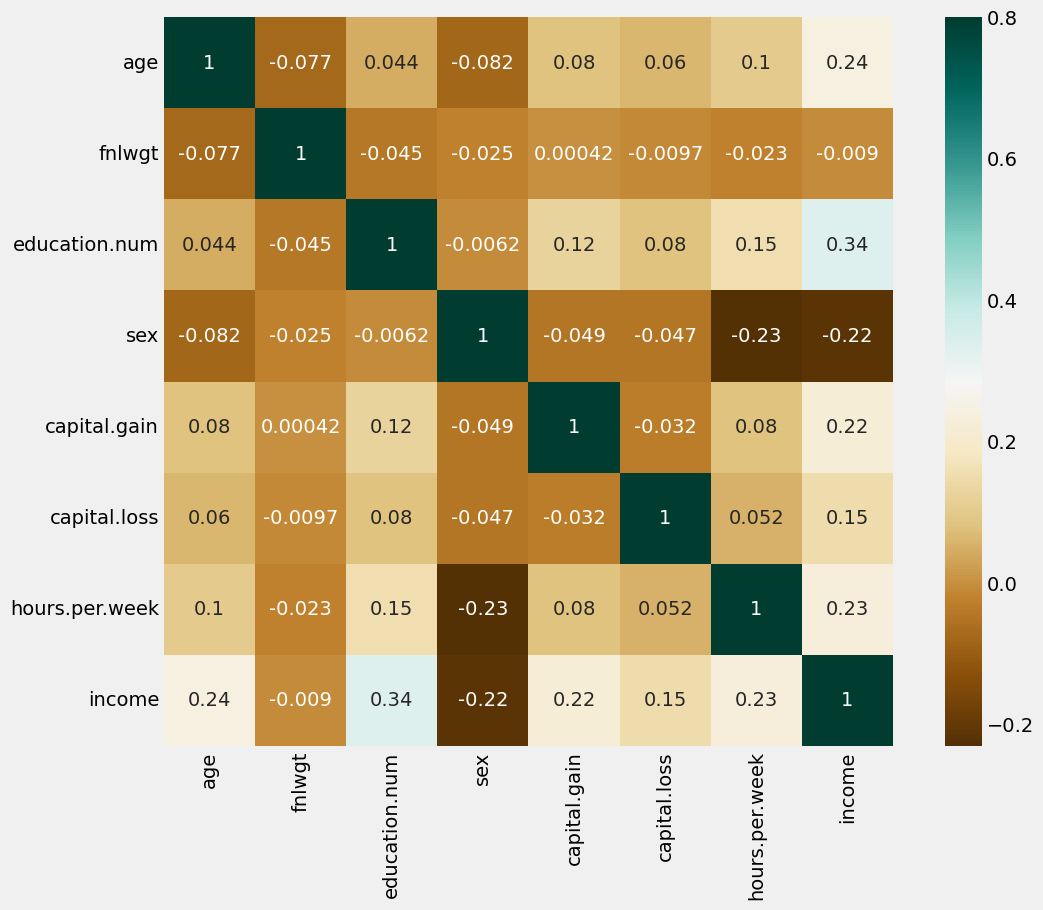

In [105]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);
df2 = df.copy()

Transformamos todas las  variables categoricas a numericas

In [106]:
# Transformamos las variables categoricas a numéricas
cat_columns = ['native.country','workclass','sex','race','relationship','occupation','marital.status','education']
df[cat_columns]
for features in df[cat_columns].columns:
    df[features] = pd.Categorical(df[features]).codes 

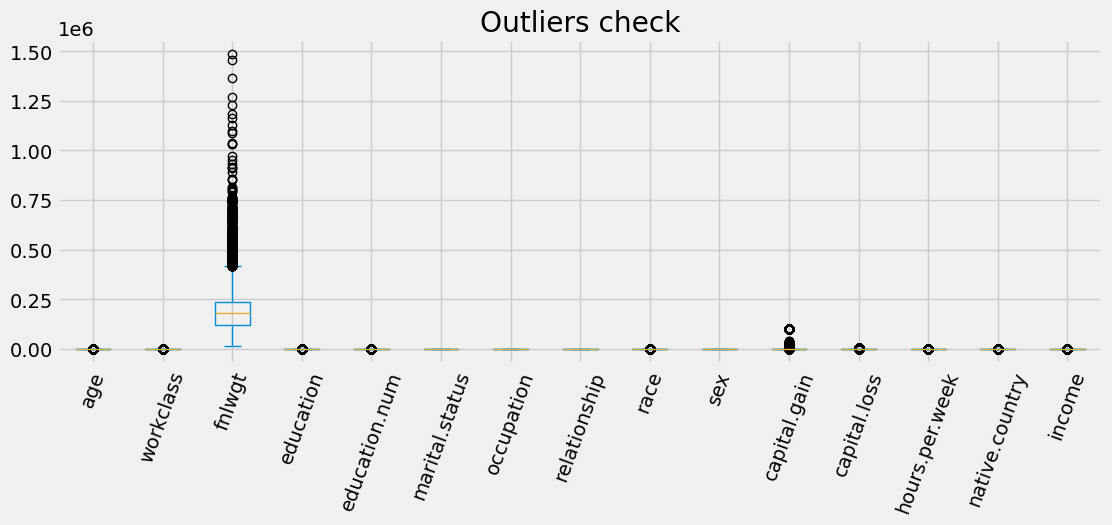

In [107]:
# Graficamos los valores atípicos
plt.style.use('fivethirtyeight')
df.plot(kind='box',figsize=(12,4))
plt.xticks(rotation=70);
plt.title('Outliers check');

Vemos que podrian existir ouliers procedemos a limpiarlos.

In [108]:
#"""
def treat_outlier(x):
    sorted(x)
    q1,q3=np.percentile(x,[25,75])
    iqr=q3-q1
    l_r=q1-(1.5*iqr)
    u_r=q3+(1.5*iqr)
    return l_r,u_r  

In [109]:

for i in df[num_columns].columns:
    lr,ur = treat_outlier(df[i])
    df[i] = np.where(df[i]>ur,ur,df[i])
    df[i] = np.where(df[i]<lr,lr,df[i])

In [110]:
num_columns


['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [111]:
df2

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,1,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,0,0,3770,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,0,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0


División de los datos

In [112]:
X= df.drop('income',axis=1)
y= df.pop('income')

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=30,random_state =1)


# Escalado de datos

In [114]:
X_train


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
17687,20.0,2,131852.0,11,9.0,4,0,1,4,1,0.0,0.0,40.0,38
23931,38.0,2,185556.0,15,10.0,2,2,0,4,0,0.0,0.0,40.0,21
6669,54.0,4,175804.0,9,13.0,2,3,0,4,0,0.0,0.0,40.0,38
32219,31.0,0,381645.0,9,13.0,5,9,1,4,0,0.0,0.0,40.0,38
21337,33.0,2,171215.0,12,14.0,4,0,3,4,0,0.0,0.0,40.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18645,28.0,2,137296.0,7,12.0,4,7,1,2,1,0.0,0.0,40.0,38
5562,59.0,1,165695.0,15,10.0,2,2,0,4,0,0.0,0.0,40.0,38
13125,34.0,4,114691.0,11,9.0,2,9,0,4,0,0.0,0.0,40.0,38
261,52.0,2,195635.0,11,9.0,2,6,0,4,0,0.0,0.0,38.0,38


In [115]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Sobremuestreo

In [116]:
## Sobremuestreo con SMOTE

SMOTE_oversample = SMOTE(random_state=1)
X_train,y_train = SMOTE_oversample.fit_resample(X_train, y_train.ravel())

# 6. Agregación y representación de datos
La etapa de agregación y representación de datos, se dedica a integrar múltiples conjuntos de datos para obtener una visión unificada.


No es necesario agragar ningun dato adicional

# 7. Análisis de datos
La etapa de análisis de datos se enfoca en llevar a cabo la tarea de análisis propiamente dicha, que suele implicar uno o más tipos de análisis

## Implementación

### Entrenamiento del modelo K-means

# 8. Visualización de datos
La capacidad de analizar grandes cantidades de datos y obtener información útil tiene poco valor si los únicos que pueden interpretar los resultados son los analistas.
La etapa de visualización de datos se dedica a utilizar técnicas y herramientas de visualización de datos para comunicar gráficamente los resultados del análisis con vistas a una interpretación eficaz por parte de los usuarios empresariales.

In [117]:
# Creamos un gráfico de pastel para visualizar la proporción de personas cuyos ingresos son superiores a 50k
churn_plot = df2['income'].value_counts().reset_index()
churn_plot.columns = ['income?',"Number_of_customers"]
px.pie(churn_plot,values ="Number_of_customers",names='income?',title='income',template='none')

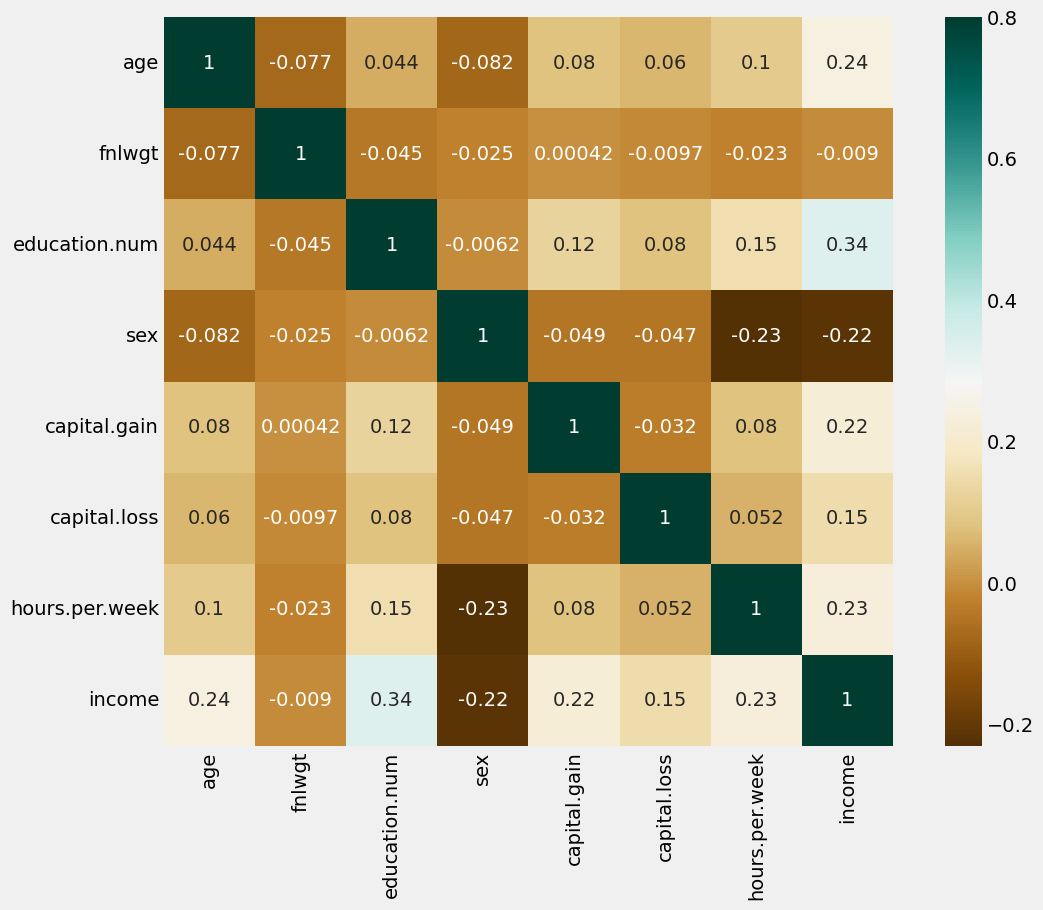

In [118]:
hmap = df2.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

# Implementación modelo

## Modelo con Árboles de decisión

In [119]:
# Importamos librerías
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


Accuracy en el set entrenamiento: 0.8309398612522646
Accuracy en el set de prueba: 0.8666666666666667
F1-score en el set de prueba: 0.75


              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.67      0.86      0.75         7

    accuracy                           0.87        30
   macro avg       0.81      0.86      0.83        30
weighted avg       0.89      0.87      0.87        30





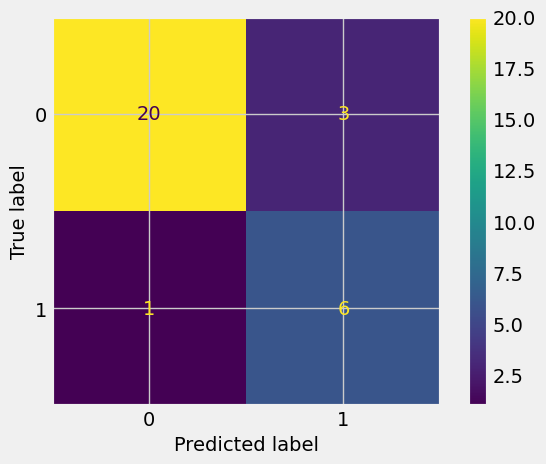

In [120]:
DT_model= DecisionTreeClassifier(max_features= 5,max_depth= 10,min_samples_split= 90,min_samples_leaf= 30,random_state=1)

# Ajuste del modelo
DT_model.fit(X_train,y_train)

# Score modelo
predict_train_DT = DT_model.predict(X_train)
predict_test_DT = DT_model.predict(X_test)

# Accuracy
DT_train_score = DT_model.score(X_train,y_train)
DT_test_score = DT_model.score(X_test,y_test)

# f1-Score
DT_f1_score = metrics.f1_score(y_test, predict_test_DT)

print('Accuracy en el set entrenamiento:',DT_train_score)
print('Accuracy en el set de prueba:',DT_test_score)
print('F1-score en el set de prueba:',DT_f1_score)
print('\n')
print(metrics.classification_report(y_test, predict_test_DT))
print('\n')
y_pred = DT_model.predict(X_test)
# Matriz de confusión
cm = metrics.confusion_matrix(y_test,y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


## Modelo con Random Forest

In [121]:
# Importamos librerías
from sklearn.ensemble import RandomForestClassifier

Accuracy en el set entrenamiento: 0.8421854977685476
Accuracy en el set de prueba: 0.9333333333333333
F1-score en el set de prueba: 0.8750000000000001


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.89      0.96      0.91        30
weighted avg       0.95      0.93      0.94        30





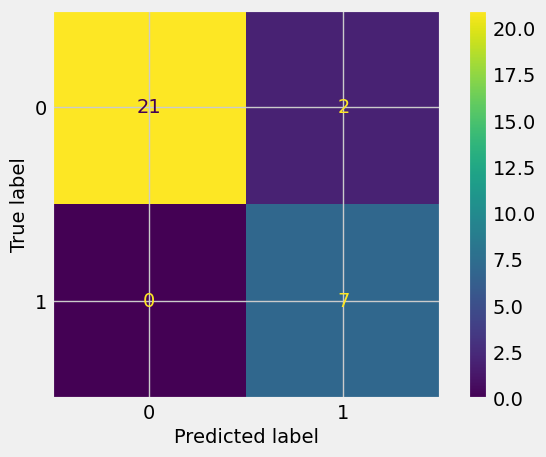

In [122]:
# Creamos el dataset para ejecutar el modelo
RF_model = RandomForestClassifier(n_estimators= 600,min_samples_split= 90,min_samples_leaf= 20,
                                  max_features= 5,max_depth= 10)# RF model tuned

# Ajuste del modelo
RF_model.fit(X_train,y_train)

# Score del modelo
predict_train_RF = RF_model.predict(X_train)
predict_test_RF = RF_model.predict(X_test)

# Accuracy
RF_train_score = RF_model.score(X_train,y_train)
RF_test_score = RF_model.score(X_test,y_test)

# f1-Score
RF_f1_score = metrics.f1_score(y_test,predict_test_RF)

print('Accuracy en el set entrenamiento:',RF_train_score)
print('Accuracy en el set de prueba:',RF_test_score)
print('F1-score en el set de prueba:',RF_f1_score)
print('\n')
print(metrics.classification_report(y_test,predict_test_RF))
print('\n')

# Matriz de confusión
y_pred = RF_model.predict(X_test)
# Matriz de confusión
cm = metrics.confusion_matrix(y_test,y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




## Modelo con XGBoost 

In [123]:
import xgboost as xgb 

Accuracy en el set entrenamiento: 0.830608457425655
Accuracy en el set de prueba: 0.9333333333333333
F1-score en el set de prueba: 0.8750000000000001


              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.89      0.96      0.91        30
weighted avg       0.95      0.93      0.94        30





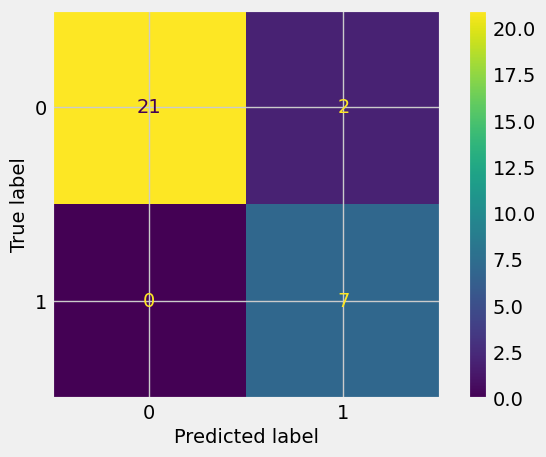

In [124]:
# Creamos el dataset para ejecutar el modelo
Xgboost_model = xgb.XGBClassifier(learning_rate=0.01,verbosity=0)

# Ajuste del modelo
Xgboost_model.fit(X_train,y_train)

# Score del modelo
predict_train_Xgb = Xgboost_model.predict(X_train)
predict_test_Xgb = Xgboost_model.predict(X_test)

# Accuracy
Xgb_train_score = Xgboost_model.score(X_train,y_train)
Xgb_test_score = Xgboost_model.score(X_test,y_test)

# f1-Score
Xgb_f1_score = metrics.f1_score(y_test,predict_test_Xgb)

print('Accuracy en el set entrenamiento:',Xgb_train_score)
print('Accuracy en el set de prueba:',Xgb_test_score)
print('F1-score en el set de prueba:',Xgb_f1_score)
print('\n')
print(metrics.classification_report(y_test,predict_test_Xgb))
print('\n')

# Matriz de confusión
y_pred = Xgboost_model.predict(X_test)
# Matriz de confusión
cm = metrics.confusion_matrix(y_test,y_pred);
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



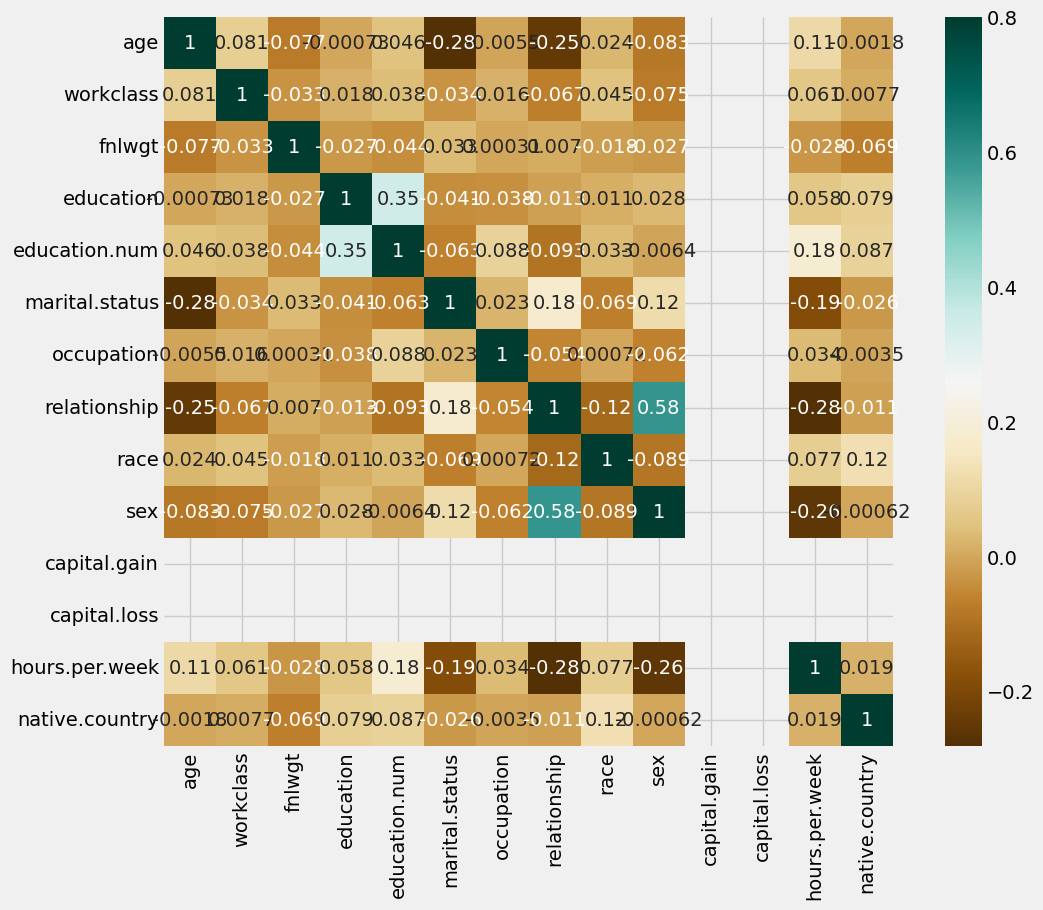

In [125]:
hmap = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [127]:
# Creamos un gráfico de pastel para visualizar la proporción de personas cuyos ingresos son superiores a 50k


# 9. Utilización de los resultados del análisis
Después de que los resultados del análisis se pongan a disposición de los usuarios de negocio para apoyar la toma de decisiones empresariales, por ejemplo a través de cuadros de mando o paneles, puede haber más oportunidades para utilizar los resultados del análisis. La etapa de utilización de los resultados del análisis, esta enfocada en determinar cómo y dónde se pueden aprovechar más los datos del análisis procesado.

In [ ]:
# Haga un breve análisis de los hallazgos 
durante el estudio logramos observar  que los resultados de los tres modelos usados xgboost,Forest,Árboles de decisión obtubimos resultados similares.

In [128]:
# Detalle sus conclusiones sobre el modelo obtenido
models_list = [Xgboost_model,RF_model,DT_model]
recall =[]
precision =[]
test_acc = []
train_acc = []
f1score = []

for model in models_list:
    predict_test = model.predict(X_test)
    predict_train = model.predict(X_train)
    f1s = metrics.f1_score(y_test, predict_test)
    pre = metrics.precision_score(y_test, predict_test)
    rec = metrics.recall_score(y_test, predict_test)
    acc_test = model.score(X_test,y_test)
    acc_train = model.score(X_train,y_train)
    
    recall.append(rec)
    precision.append(pre)
    test_acc.append(acc_test)
    train_acc.append(acc_train)
    f1score.append(f1s)
    
model_compare = pd.DataFrame({
'Models':['XGboost','Random_Forest','Arbol_Decisión'],
'recall':recall,
'Precisión':precision,
'F1-Score':f1score,
'Accuracy en Prueba':test_acc,
'Accuracy en Entrenamiento':train_acc
})

In [ ]:
# Qué acciones sugerería a los directivos de la empresa?
